In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from ucimlrepo import fetch_ucirepo, list_available_datasets

# list available datasets
# print(list_available_datasets())

/home/fredguile/anaconda3/envs/ai/lib/python3.11/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [2]:
# fetch dataset "Iris"
iris = datasets.load_iris()
t = [x for x in np.arange(21)]
keys = [x for x in range(21)]
x = iris.data[0,0]

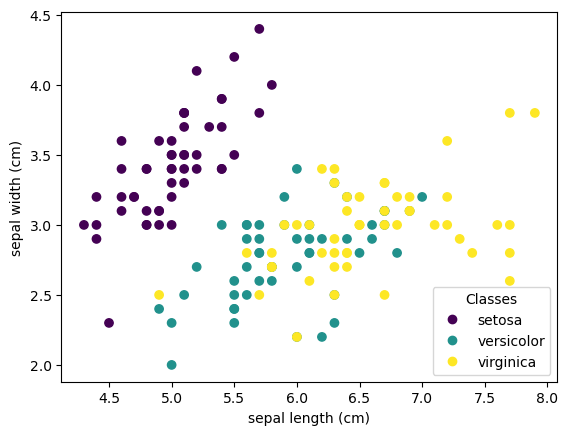

In [3]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

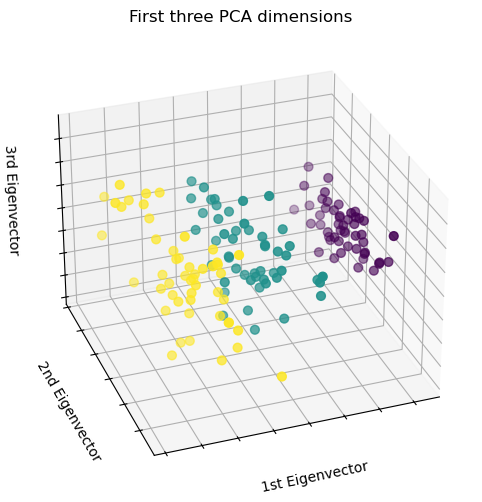

In [4]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)

ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

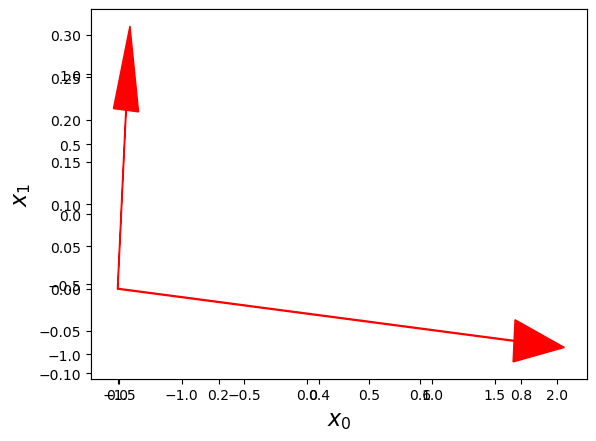

In [13]:
from sklearn import decomposition

x = np.load("iris_features.npy", allow_pickle=True)[:,:2]
y = np.load("iris_labels.npy", allow_pickle=True)
# idx = np.where(y != 0)
# x = x[idx]
x[:,0] -= x[:,0].mean()
x[:,1] -= x[:,1].mean()

pca = decomposition.PCA(n_components=2)
pca.fit(x)
v = pca.explained_variance_ratio_

plt.scatter(x[:,0], x[:,1], marker='o', color='b')
ax = plt.axes()
x0 = v[0]*pca.components_[0,0]
y0 = v[0]*pca.components_[0,1]
ax.arrow(0, 0, x0, y0, head_width=0.05, head_length=0.1, fc='r', ec='r')
x1 = v[1]*pca.components_[1,0]
y1 = v[1]*pca.components_[1,1]
ax.arrow(0,0, x1, y1, head_width=0.05, head_length=0.1, fc='r', ec='r')
plt.xlabel("$x_0$", fontsize=16)
plt.ylabel("$x_1$", fontsize=16)
plt.show()


